In [1]:
from learning_agent import robo_scientist
from theories import theory_feynman
from theories import theory_polynomial1D
from theories import theory_polynomial2D
from theories import theory_nested_formulas
from theories import theory_master
from environments import ohm_law, single_param_linear_law, env_1, sin, tg, arcsin, cos, env_2
from data_generator import simple_generator, std_generator
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(context="paper", style="whitegrid", font_scale=2)


In [2]:
feynman_dir = os.path.join(os.getcwd(), 'theories/feynman/')
working_dirs = {
    theory_feynman.TheoryFeynman: feynman_dir,
}

In [3]:
class Analyser(object):    
    def stats_for_env(self, filename, env_cls, theories_with_params, env_params, iterations_count):
        feynman_dir = os.path.join(os.getcwd(), 'theories/feynman/')
        working_dirs = {
            theory_feynman.TheoryFeynman: feynman_dir,
        }
        rs = robo_scientist.RoboScientist(working_dirs, keep_full_history=True)
        mses = {}
        for t_with_params in theories_with_params:
            t, t_params = t_with_params[0], t_with_params[1]
            print(t)
            include_derivatives = (t == theory_polynomial1D.TheoryPolynomial1D or
                                   t == theory_polynomial2D.TheoryPolynomial2D)
            env = env_cls(**env_params, include_derivatives=include_derivatives)
            gen = simple_generator.SimpleGenerator
            if t == theory_master.MasterTheory:
                gen = std_generator.STDGenerator
            rs.explore_environment(env, t, simple_generator.SimpleGenerator, 
                                   iterations_count, t_params)
            h = rs.get_history_for_exploration_key(robo_scientist.ExplorationKey(
                env_cls.__name__, t.__name__))
            mses[(t.__name__, str(t_params))] = np.array([a.mse for a in h])
            print(t.__name__, str(t_params))

        colors = ['r', 'g', 'b', 'purple', 'black', 'tan', 'turquoise']
        f = plt.figure(figsize=(18, 8), dpi=100)
        inf = 80
        for i in range(len(mses)):
            m = mses[(theories_with_params[i][0].__name__, str(theories_with_params[i][1]))]
            log_mses = np.where(m > 0, np.log(m), -inf)
            plt.plot(log_mses, c=colors[i],
                     label='{}, params: {}'.format(
                         theories_with_params[i][0].__name__, theories_with_params[i][1]))
        plt.title('Environment: {}, params: {}'.format(env_cls.__name__, env_params))
        plt.xlabel('iterations count (dataset size)')
        plt.ylabel('log MSE')
        plt.legend()
#         plt.tick_params(labelsize=15)
        plt.tight_layout()
        f.savefig(filename, dpi=f.dpi)
        plt.show()

In [4]:
a = Analyser()

<class 'theories.theory_feynman.TheoryFeynman'>
TheoryFeynman {}
<class 'theories.theory_polynomial1D.TheoryPolynomial1D'>
TheoryPolynomial1D {'polynomial_type': 'Chebyshev', 'polynomial_cnt': 4}
<class 'theories.theory_polynomial1D.TheoryPolynomial1D'>
TheoryPolynomial1D {'polynomial_type': 'Fourier', 'polynomial_cnt': 7}
<class 'theories.theory_polynomial1D.TheoryPolynomial1D'>
TheoryPolynomial1D {'polynomial_type': 'Fourier', 'polynomial_cnt': 12}


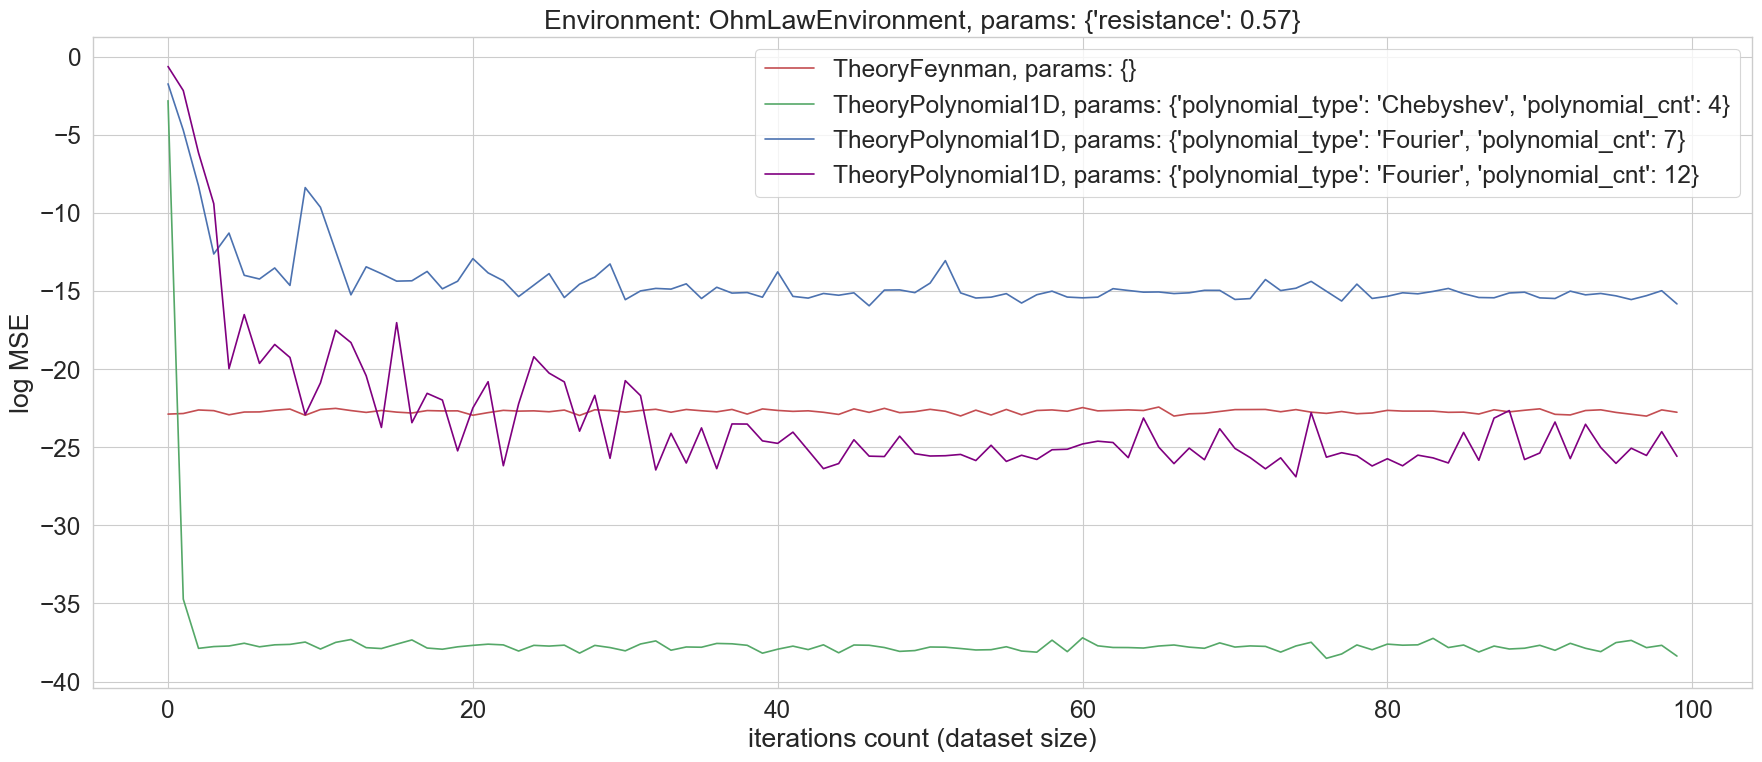

In [7]:
theories = [
    (theory_feynman.TheoryFeynman, {}), 
#     (theory_nested_formulas.TheoryNestedFormula, {}),
#     (theory_polynomial1D.TheoryPolynomial1D, 
#      {'polynomial_type': 'Fourier', 'polynomial_cnt': 5}),
#     (theory_polynomial1D.TheoryPolynomial1D, 
#      {'polynomial_type': 'Chebyshev', 'polynomial_cnt': 2}),
#     (theory_polynomial1D.TheoryPolynomial1D, 
#      {'polynomial_type': 'Chebyshev', 'polynomial_cnt': 3}),
    (theory_polynomial1D.TheoryPolynomial1D, 
     {'polynomial_type': 'Chebyshev', 'polynomial_cnt': 4}),
    (theory_polynomial1D.TheoryPolynomial1D, 
     {'polynomial_type': 'Fourier', 'polynomial_cnt': 7}),
    (theory_polynomial1D.TheoryPolynomial1D, 
     {'polynomial_type': 'Fourier', 'polynomial_cnt': 12}),
#     (theory_polynomial1D.TheoryPolynomial1D, 
#      {'polynomial_type': 'Chebyshev', 'polynomial_cnt': 6}),
#     (theory_polynomial1D.TheoryPolynomial1D, 
#      {'polynomial_type': 'Chebyshev', 'polynomial_cnt': 8}),
#     (theory_polynomial1D.TheoryPolynomial1D, 
#      {'polynomial_type': 'Chebyshev', 'polynomial_cnt': 10}),
#     (theory_polynomial1D.TheoryPolynomial1D, 
#      {'polynomial_type': 'Chebyshev', 'polynomial_cnt': 20}),
]

a.stats_for_env('f1', ohm_law.OhmLawEnvironment, theories, {'resistance': 0.57}, 100)

<class 'theories.theory_polynomial2D.TheoryPolynomial2D'>
TheoryPolynomial2D {'polynomial_type': 'Fourier', 'polynomial_cnt': 10}
<class 'theories.theory_polynomial2D.TheoryPolynomial2D'>
TheoryPolynomial2D {'polynomial_type': 'Chebyshev', 'polynomial_cnt': 10}
<class 'theories.theory_feynman.TheoryFeynman'>


2020-05-27 22:25:39 - rs.TheoryFeynman - WARNING: Error while reading solution file
2020-05-27 22:25:39 - rs.TheoryFeynman - ERROR: Unable to evaluate formula . MSE=1000
2020-05-27 22:25:39 - rs.TheoryFeynman - ERROR: Exception raised: unexpected EOF while parsing (<string>, line 0)
2020-05-27 22:25:39 - rs.TheoryFeynman - ERROR: Unable to evaluate formula . MSE=1000
2020-05-27 22:25:39 - rs.TheoryFeynman - ERROR: Exception raised: unexpected EOF while parsing (<string>, line 0)
2020-05-27 22:25:59 - rs.TheoryFeynman - ERROR: Unable to evaluate formula . MSE=1000
2020-05-27 22:25:59 - rs.TheoryFeynman - ERROR: Exception raised: unexpected EOF while parsing (<string>, line 0)
2020-05-27 22:30:13 - rs.TheoryFeynman - WARNING: Error while reading solution file
2020-05-27 22:32:45 - rs.TheoryFeynman - WARNING: Error while reading solution file


TheoryFeynman {'BF_try_time': 10}


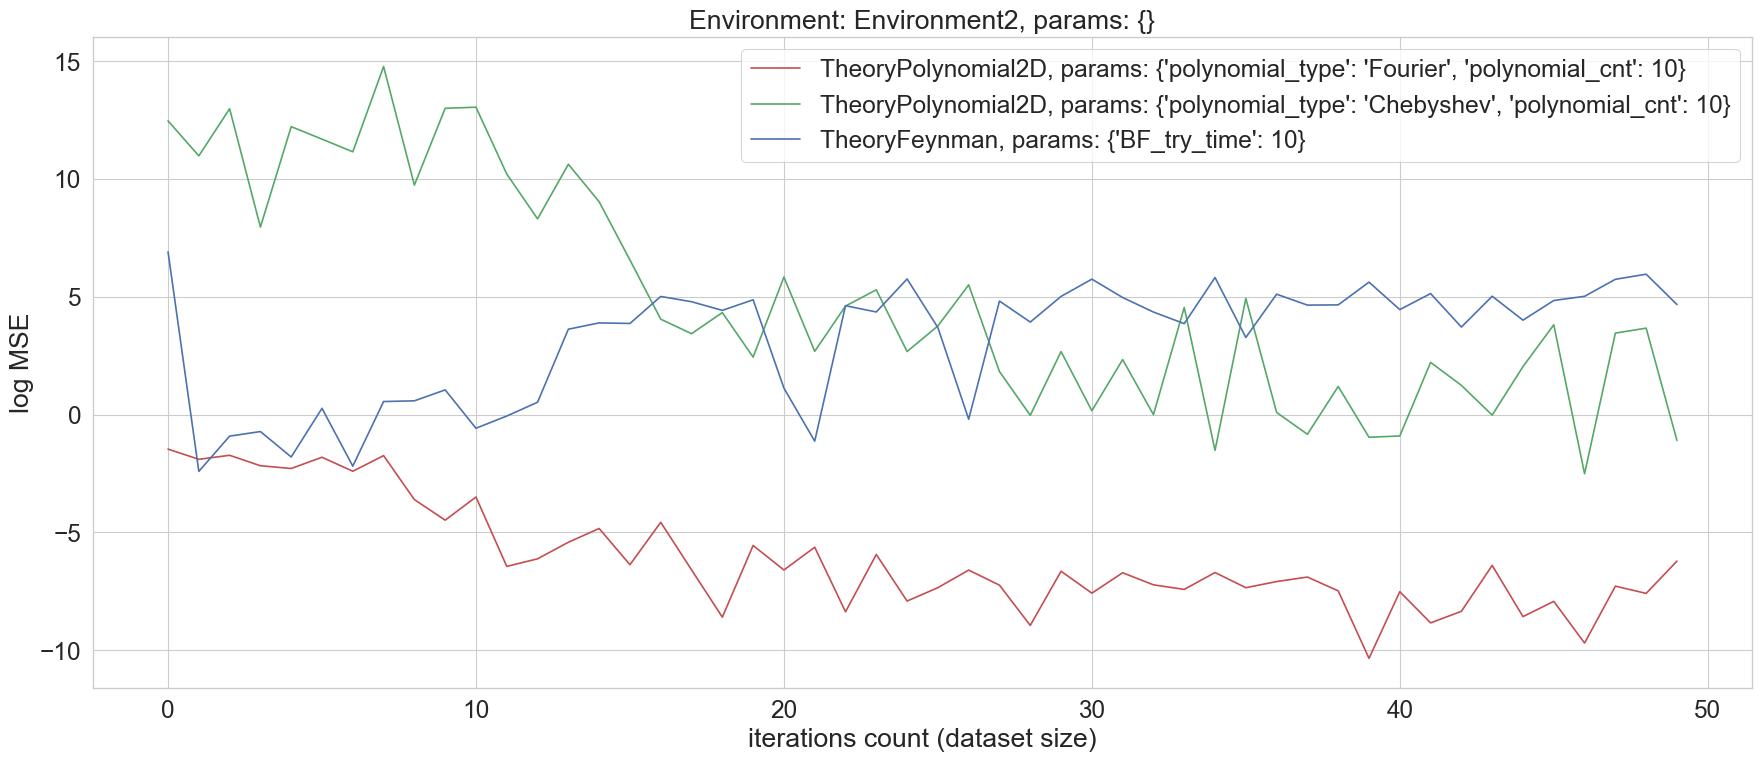

In [5]:
a = Analyser()
theories = [
#     (theory_feynman.TheoryFeynman, {}), 
#     (theory_nested_formulas.TheoryNestedFormula, {}),
    (theory_polynomial2D.TheoryPolynomial2D, 
     {'polynomial_type': 'Fourier', 'polynomial_cnt': 10}),
    (theory_polynomial2D.TheoryPolynomial2D, 
     {'polynomial_type': 'Chebyshev', 'polynomial_cnt': 10}),
    (theory_feynman.TheoryFeynman, {'BF_try_time': 10}), 
]

a.stats_for_env('f2', env_2.Environment2, theories, {}, 50)

In [29]:
def stats_for_env(env_cls, cnt, name, p_count=5, **params):
    feynman_dir = os.path.join(os.getcwd(), 'theories/feynman/')
    working_dirs = {
        theory_feynman.TheoryFeynman: feynman_dir,
    }
    rs = robo_scientist.RoboScientist(working_dirs, keep_full_history=True)
    theory_cls = [
        theory_feynman.TheoryFeynman, 
        theory_nested_formulas.TheoryNestedFormula,
        theory_polynomial1D.TheoryPolynomial1D,
        theory_master.MasterTheory
    ]
    mses = {}
    for t in theory_cls:
        tt = {}
        if t == theory_polynomial1D.TheoryPolynomial1D:
            tt['params_cnt'] = p_count
        env = env_cls(**params, include_derivatives=t == theory_polynomial1D.TheoryPolynomial1D)
        gen = simple_generator.SimpleGenerator
        if t == theory_master.MasterTheory:
            gen = std_generator.STDGenerator
        rs.explore_environment(env, t, simple_generator.SimpleGenerator, cnt)
        h = rs.get_history_for_exploration_key(robo_scientist.ExplorationKey(
            env_cls.__name__, t.__name__))
        mses[t.__name__] = np.array([a.mse for a in h])
        print(t.__name__)
    
    colors = ['r', 'g', 'b', 'purple']
    f = plt.figure(figsize=(18, 8), dpi=100)
    for i in range(len(mses)):
        m = mses[theory_cls[i].__name__]
        log_mses = np.where(m > 0, np.log(m), -100)
        plt.plot(log_mses, c=colors[i], label=theory_cls[i].__name__)
    plt.title('Environment: {}, params: {}'.format(env_cls.__name__, params), size=20)
    plt.xlabel('iterations count', size=18)
    plt.ylabel('log MSE', size=18)
    plt.legend()
    plt.tick_params(labelsize=15)
    plt.tight_layout()
    f.savefig(name, dpi=f.dpi)
    plt.show()

TheoryFeynman
TheoryNestedFormula
TheoryPolynomial1D
MasterTheory


/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log
/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in log
/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in log


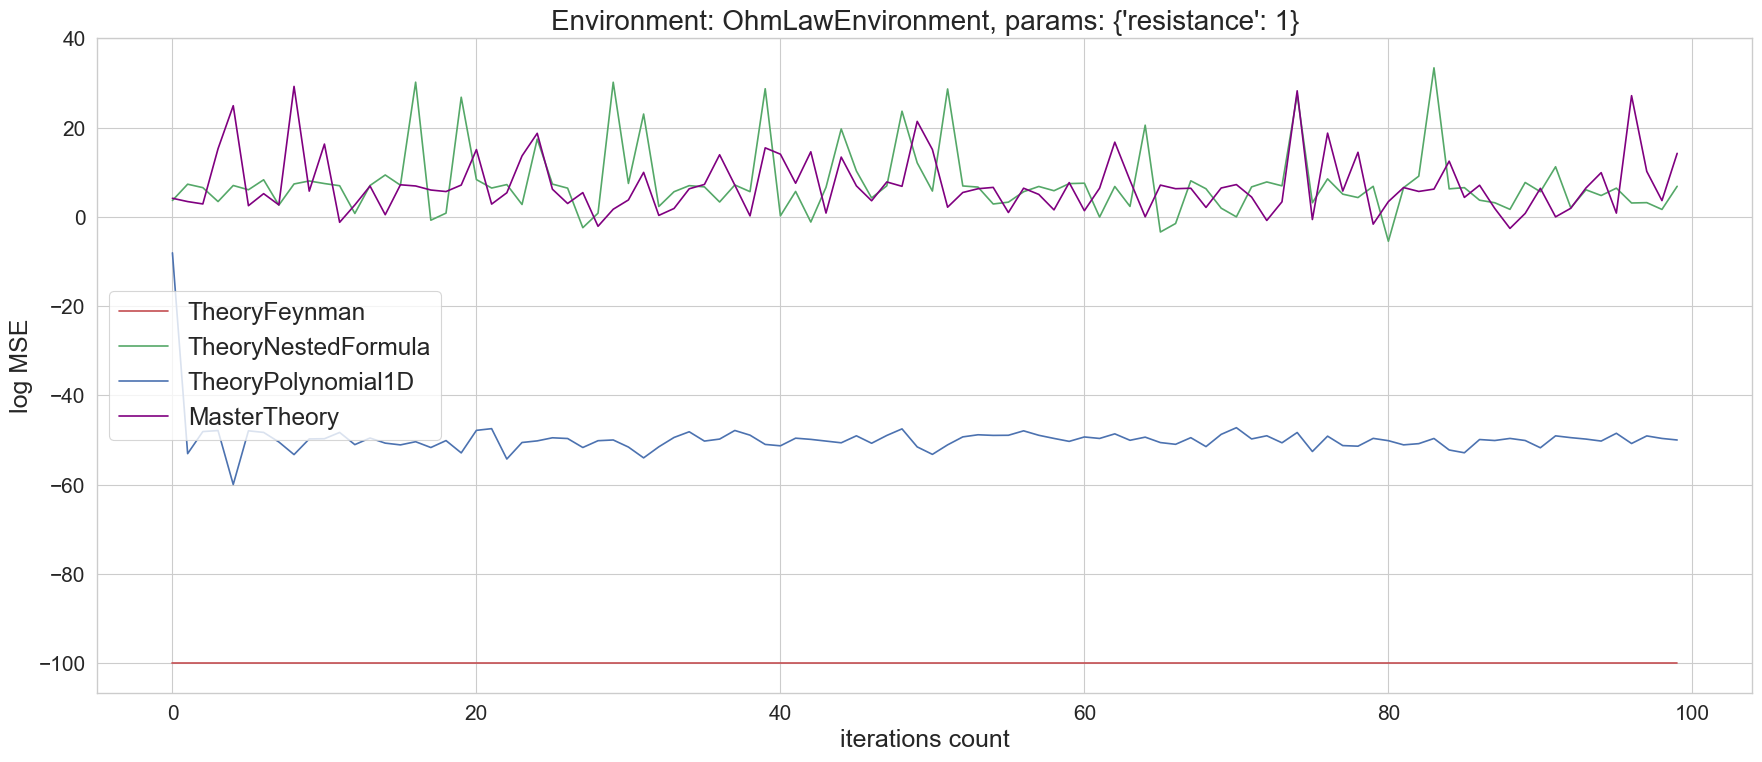

In [30]:
stats_for_env(ohm_law.OhmLawEnvironment, 100, name='picture', resistance=1)

TheoryPolynomial1D


KeyboardInterrupt: 

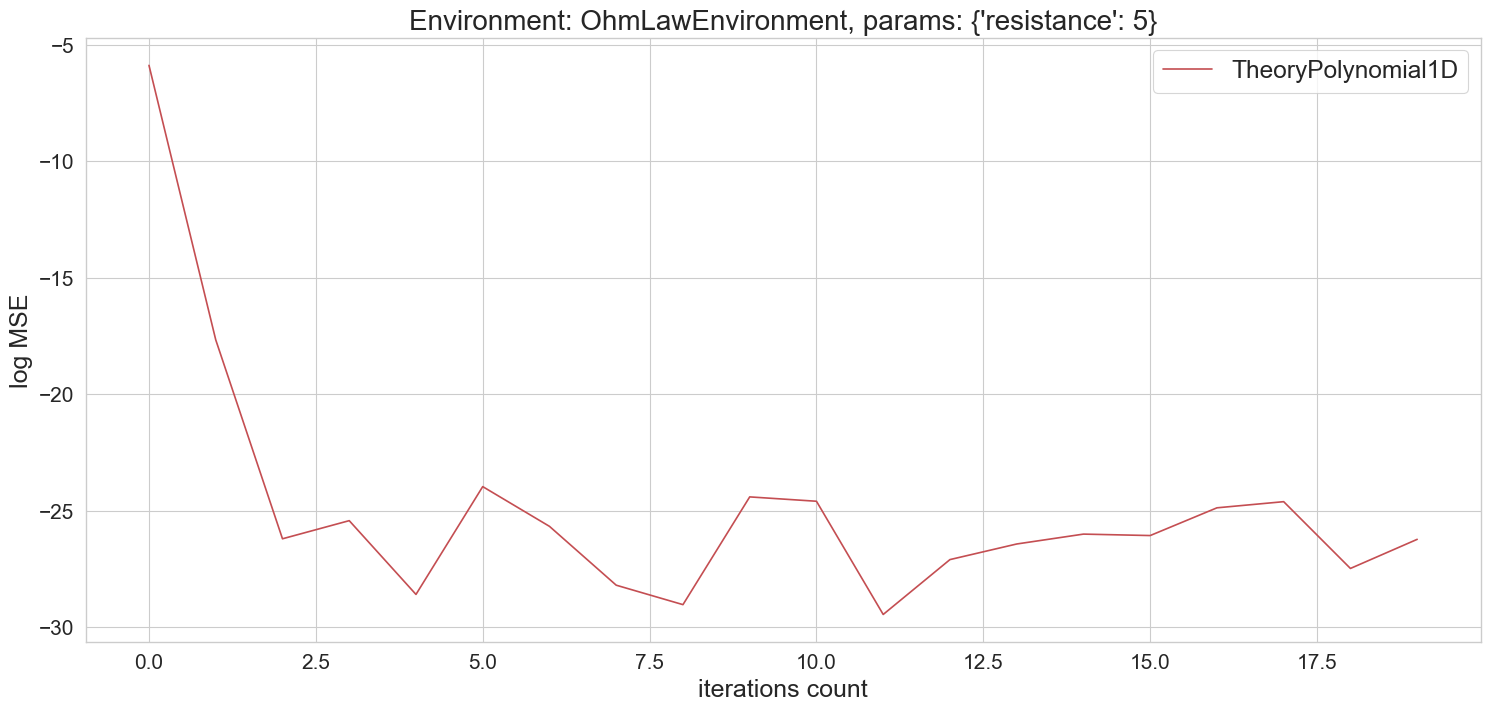

In [26]:
stats_for_env(ohm_law.OhmLawEnvironment, 20, name='picture', resistance=5)

TheoryFeynman
TheoryNestedFormula
TheoryPolynomial1D
MasterTheory


/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in log


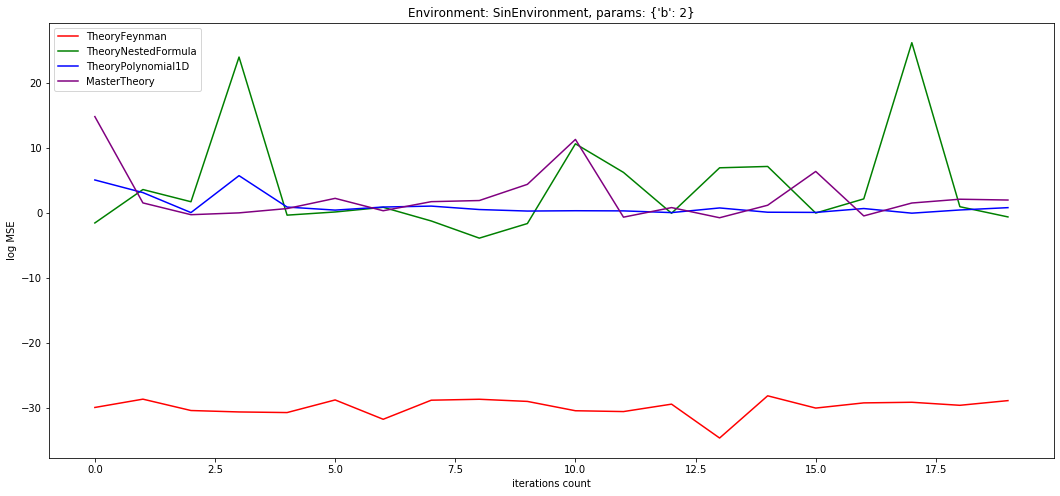

In [5]:
stats_for_env(sin.SinEnvironment, 20, p_count=20, b=2)

TheoryFeynman
TheoryNestedFormula
TheoryPolynomial1D
MasterTheory


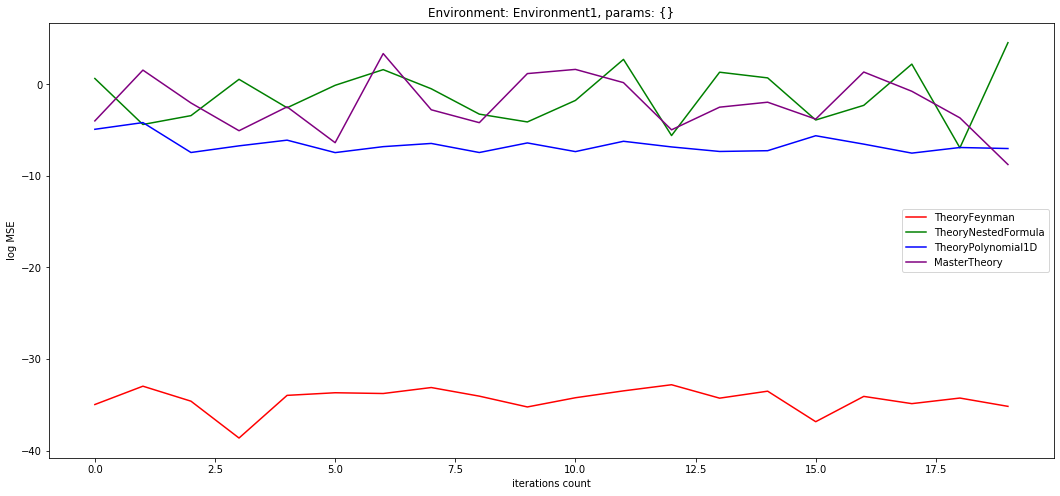

In [4]:
stats_for_env(env_1.Environment1, 20)